In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the DataFrame and transform the data
market_data_scaled = scaler.fit_transform(market_data_df)

In [5]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using the scaled DataFrame
    model.fit(market_data_scaled_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  170.193571
3   4   79.022435
4   5   71.097914
5   6   66.108827
6   7   54.488123
7   8   43.224693
8   9   32.860884
9  10   28.404885


C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


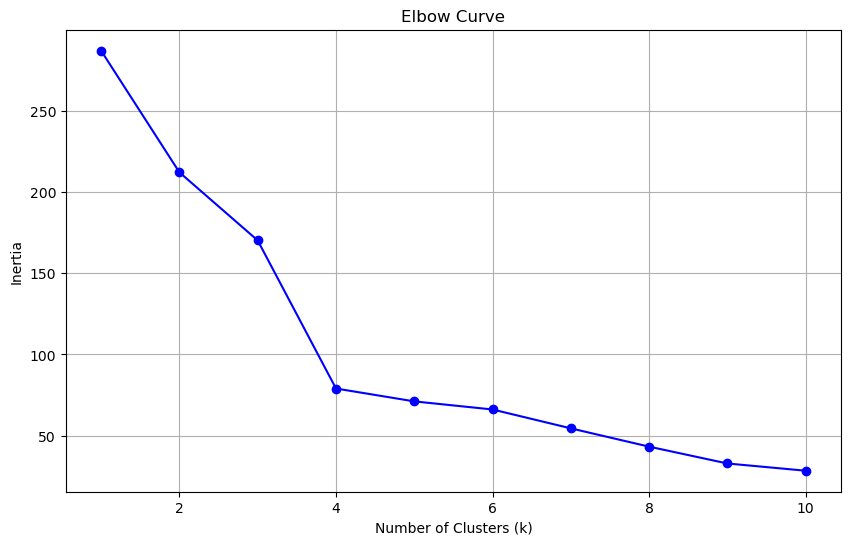

    k     inertia
0   1  287.000000
1   2  212.123342
2   3  170.193571
3   4   79.022435
4   5   71.097914
5   6   66.108827
6   7   54.488123
7   8   43.224693
8   9   32.860884
9  10   28.404885


In [7]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

print(elbow_df)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the elbow plot and df, id assume 4 to be the best value for k

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [9]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled_df)

C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(market_data_scaled_df)

# View the resulting array of cluster values.
print("Cluster Labels:", cluster_labels)

Cluster Labels: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [11]:
# Create a copy of the DataFrame
df_clustered = market_data_scaled_df.copy()

In [12]:
# Add a new column to the DataFrame with the predicted clusters
df_clustered['Cluster'] = cluster_labels

# Display sample data
display(df_clustered.head())

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


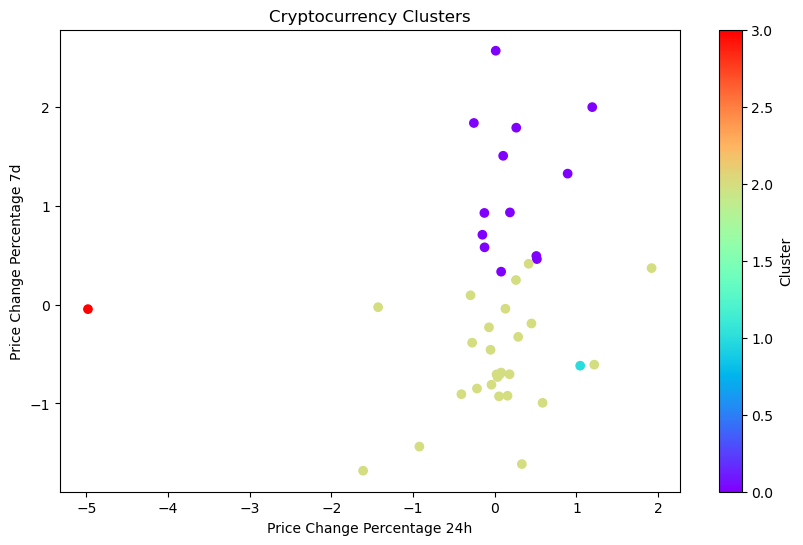

In [13]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clustered['price_change_percentage_24h'], 
            df_clustered['price_change_percentage_7d'], 
            c=df_clustered['Cluster'], 
            cmap='rainbow')

# Add labels and title
plt.xlabel('Price Change Percentage 24h')
plt.ylabel('Price Change Percentage 7d')
plt.title('Cryptocurrency Clusters')

# Add a color bar
plt.colorbar(label='Cluster')

# Show the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_results = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
print(pca_results[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [16]:
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Between the three of them they explain a 89.50% variance which is rather good meaning we kept a lot of the data while having reduced the dimensionality of the data.

In [19]:
# Convert the results to a DataFrame
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2', 'PC3'])

# Set the index of pca_df to be the same as market_data_df which is coin_id
pca_df.index = market_data_df.index

# Display sample data
print(pca_df.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [20]:
# Define a range of k values for the KMeans algorithm to test from 1 to 10 clusters
k_values = range(1, 11)

# Initialize an empty list to store the inertia values for each k
inertia = []

# Loop over each k value in the range
for k in k_values:
    # Create a KMeans model with the current number of clusters (k) and a fixed random state for reproducibility
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the PCA-transformed data (pca_df)
    model.fit(pca_df)
    
    # Append the inertia (sum of squared distances to the nearest cluster center) of the current model to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the k values and their corresponding inertia values
pcaelbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Convert the dictionary into a DataFrame to facilitate plotting the Elbow curve
pcaelbow_df = pd.DataFrame(pcaelbow_data)

# Display the DataFrame to visualize the k values and their associated inertia
display(pcaelbow_df)

C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


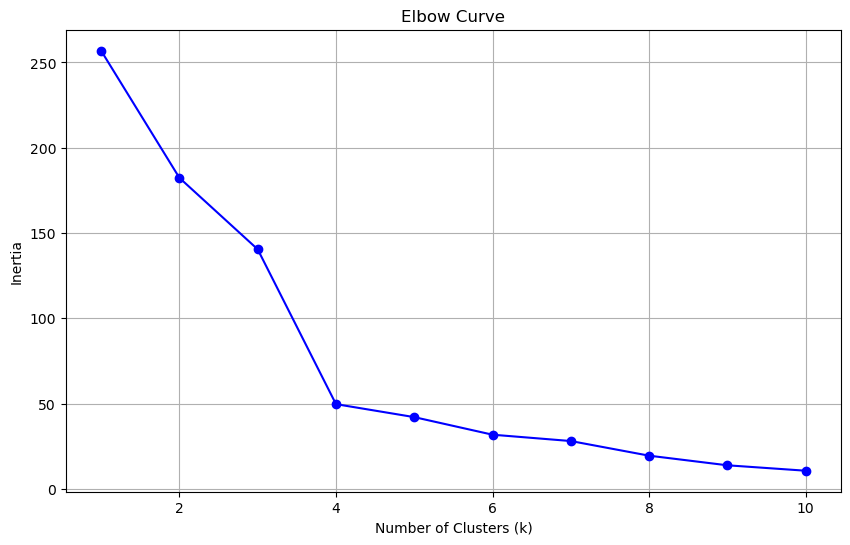

    k     inertia
0   1  256.874086
1   2  182.339530
2   3  140.431833
3   4   49.665497
4   5   42.051901
5   6   31.749005
6   7   28.031869
7   8   19.451747
8   9   13.814082
9  10   10.630648


In [21]:
# Plot the elbow curve for the PCA data
plt.figure(figsize=(10, 6))
plt.plot(pcaelbow_df['k'], pcaelbow_df['inertia'], 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

print(pcaelbow_df)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The number of clusters based on this method is the same as before, 4 clusters appears to be the best amount for this data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [24]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

C:\Users\Chaos\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pcacluster_labels = kmeans.predict(pca_df)

# View the resulting array of cluster values.
print("PCA Cluster Labels:", pcacluster_labels)

PCA Cluster Labels: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [27]:
# Create a copy of the DataFrame with the PCA data
pca_df_clustered = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_clustered['PCA Cluster Labels'] = pcacluster_labels

# Display sample data
display(pca_df_clustered.head(5))

,PC1,PC2,PC3,PCA Cluster Labels
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [28]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

scatter_plot = pca_df_clustered.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='PCA Cluster Labels', 
    hover_cols=['coin_id'], 
    title='Cryptocurrency Clusters',
    height=500,
    width=700
)

scatter_plot

:NdOverlay   [PCA Cluster Labels]
   :Scatter   [PC1]   (PC2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    